# Exercise: Taxonomy Induction Solutions



## Question 1 - Relations Extraction

  
  
  ###  Question 1.a

  Load the given file <b>wiki_food_en.txt</b> into memory using the following code:
  
  
  

In [1]:
def load_text_file(filename):
    file_text = []
    with open(filename, encoding="utf-8") as fp:
        for line in fp:
            file_text.append(line.strip().lower())
    return " ".join(file_text)

file_text = load_text_file("wiki_food_en.txt")

In [2]:
## Code for finding matches

import re

def find_matches(file_text, regexp_string):
    #Compile a regular expression 
    regexp = re.compile(regexp_string)
    
    #Find all matches with the given regular expression
    # findall function finds all matches of the given regular expression in the file_text.
    matches = re.findall(regexp, file_text)
    
    return matches

isa_matches = find_matches(file_text, "[a-z]+ is a [a-z]+")

 ###  Question 1.b

Run the above code for relations extraction with the following lexico-syntactic patterns:

<ol>
  <li>X such as Y</li>
  <li>such X as Y</li>
<li>X and other Y</li>  
</ol>

In [3]:
matches = find_matches(file_text, "[a-z]+ such as [a-z]+")
for i,m in enumerate(matches[0:20]):
    print (str(i+1) + ") " + m)

1) pig such as the
2) beverages such as cocktails
3) emulsifiers such as egg
4) varieties such as allioli
5) pests such as the
6) ceremonies such as weddings
7) pests such as navel
8) versions such as the
9) pests such as the
10) ceremonies such as weddings
11) pests such as navel
12) versions such as the
13) illnesses such as infections
14) pans such as a
15) manufacturing such as acetic
16) aid such as modified
17) session such as of
18) plants such as pear
19) foods such as apple
20) cheeses such as cheddar


2,3,6,10,13,19,20 are correct.
<br>

In [4]:
matches = find_matches(file_text, "such [a-z]+ as [a-z]+")
for i,m in enumerate(matches[0:20]):
    print (str(i+1) + ") " + m)

1) such serves as an
2) such flavors as chocolate
3) such factors as territorial
4) such countries as germany
5) such foods as pizza
6) such words as the
7) such factors as territorial
8) such companies as arienti
9) such ingredients as water
10) such ingredients as water
11) such places as thailand
12) such places as thailand
13) such parameters as the
14) such species as the
15) such nougat as the
16) such items as sliced
17) such species as the
18) such conditions as abscesses
19) such plants as the
20) such items as dry


2,4,5,9,10,11,12,18 are correct.
<br>

In [5]:
matches = find_matches(file_text,  "[a-z]+ and other [a-z]+")
for i,m in enumerate(matches[0:20]):
    print (str(i+1) + ") " + m)

1) france and other countries
2) figs and other recipes
3) azerbaijan and other central
4) olives and other tree
5) azerbaijan and other central
6) olives and other tree
7) rye and other flours
8) france and other european
9) sauces and other sauces
10) mixes and other gluten
11) petals and other flower
12) petals and other flower
13) tariff and other supports
14) wars and other fairtrade
15) wine and other ingredients
16) date and other agronomic
17) soups and other foods
18) patties and other bulk
19) spices and other substances
20) sugars and other components


1,4,6,7,15,17,19,20 are correct.
<br>
The main difference between patterns 1,2 vs. 3 are that the hypernym appears first in 1,2 whereas it appears later in the pattern 3. For example:

1. hypernym such as hyponym
2. such hypernym as hyponym
3. hyponym and other hypernym

## Question 2 - Graph Construction


###  Question 2.a


Load the IsA relations of the food domain from the given file "food_isa_relations.txt" using the following code:

In [6]:
rels = []
with open("food_isa_relations.txt") as fp:
    for line in fp.readlines():
        toks = line.strip().split('\t')
        rels.append((toks[0],toks[1],float(toks[2])))

###  Question 2.b


In [7]:
from collections import defaultdict

noisy_relations = defaultdict(dict)
for hypo, hyper, freq in rels:
    noisy_relations[hypo][hyper] = freq

In [8]:
noisy_relations['apple']

{'apple': 0.41334243636,
 'brand': 0.0915626602388,
 'company': 0.547120747653,
 'company in the world': 0.0747098410221,
 'crop': 0.0988772876235,
 'flavour': 0.0858994706649,
 'food': 0.147812587177,
 'fruit': 1.0,
 'fruit tree': 0.115782511138,
 'hardware company': 0.0897298351702,
 'ingredient': 0.068957229831,
 'manufacturer': 0.079702775123,
 'orange': 0.155466692675,
 'product': 0.0697003665663,
 'rival': 0.0788062030625,
 'tag': 0.0736281177128,
 'tech company': 0.120745147762,
 'technology company': 0.0755438963724,
 'tree': 0.110838111316,
 'vegetable': 0.132148274312}

In [9]:
for hypo in noisy_relations.keys():
    sorted_hypernyms = sorted(noisy_relations[hypo].items(), key = lambda x: -1 *x[1])
    noisy_relations[hypo] = {k:v for k,v in sorted_hypernyms[0:5]}
    
# Printed filtered noisy relations.
noisy_relations['apple']   

{'apple': 0.41334243636,
 'company': 0.547120747653,
 'food': 0.147812587177,
 'fruit': 1.0,
 'orange': 0.155466692675}

###  Question 2.c

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()

for hypo in noisy_relations.keys():
    for hyper in noisy_relations[hypo].keys():
        G.add_edge(hypo, hyper)
  
for p in nx.all_simple_paths(G, source='apple', target='food'):
    print (p)

['apple', 'orange', 'fruit', 'food']
['apple', 'orange', 'fruit', 'ingredient', 'food']
['apple', 'fruit', 'food']
['apple', 'fruit', 'ingredient', 'food']
['apple', 'food']


In [11]:
for p in nx.all_simple_paths(G, source='fusilli', target='food'):
    print (p)

['fusilli', 'pasta', 'dish', 'food']
['fusilli', 'pasta', 'food']
['fusilli', 'pasta', 'ingredient', 'food']


In [12]:
for p in nx.all_simple_paths(G, source='okra', target='food'):
    print (p)

['okra', 'vegetable', 'food']
['okra', 'vegetable', 'ingredient', 'food']


In general, the shorter paths are more likely to be accurate. the longer paths are more likely to contain noisy edges.


###  Question 2.d


In [13]:
%matplotlib inline

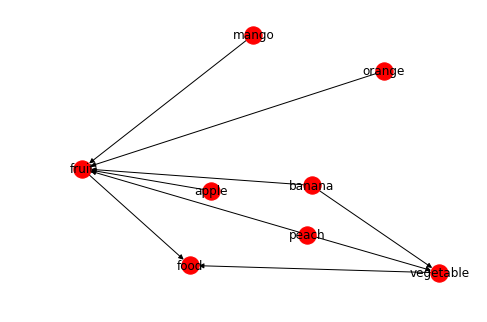

In [14]:

def select_paths(vocab, root, l, nx_graph):
    retained_paths = []
    for term in vocab:
        for path in nx.all_simple_paths(nx_graph, source=term, target=root):
            if len(path) == l:
                retained_paths.append(path)
    return retained_paths


def aggregate_paths(paths):
    agg_graph = defaultdict(dict)
    
    for path in paths:
        for i,term in enumerate(path[0:len(path) -1]):
            agg_graph[term][path[i+1]] = 1
            
    return agg_graph


V = ['apple', 'mango', 'peach', 'orange', 'banana']
root = 'food'

graph = aggregate_paths(select_paths(V, root, 3, G))
 

# Plot the graph
def plot_graph(graph):
    Gt = nx.DiGraph()
    for k in graph.keys():
        for k1 in graph[k].keys():
            Gt.add_edge(k,k1)
    nx.draw(Gt, with_labels=True)
    plt.show()
    
plot_graph(graph)

###  Question 2.e

Plot the aggregated graph using the previous steps but with different path lengths (For example, 2 or 4). What do you notice?



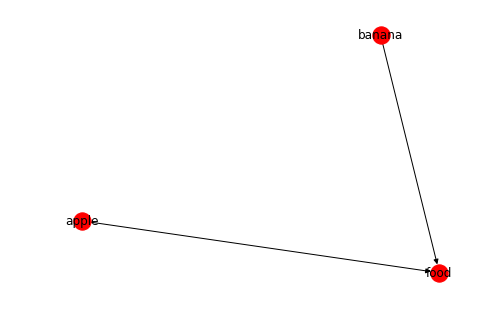

In [15]:
graph = aggregate_paths(select_paths(V, root, 2, G))
plot_graph(graph)

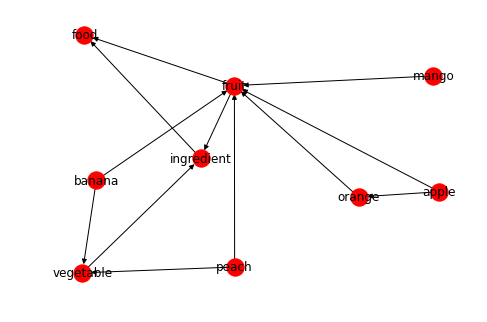

In [16]:
graph = aggregate_paths(select_paths(V, root, 4, G))
plot_graph(graph)

As we can observe, when the path lengths increase, the noise in the resulting graph increases.

###  Question 2.f


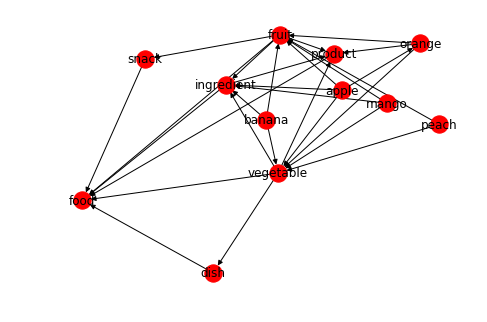

In [17]:
rels = []
with open("food_isa_relations.txt") as fp:
    for line in fp.readlines():
        toks = line.strip().split('\t')
        rels.append((toks[0],toks[1],float(toks[2])))
        
noisy_relations = defaultdict(dict)
for hypo, hyper, freq in rels:
    noisy_relations[hypo][hyper] = freq
    
G=nx.DiGraph()

for hypo in noisy_relations.keys():
    for hyper in noisy_relations[hypo].keys():
        G.add_edge(hypo, hyper)
    
graph = aggregate_paths(select_paths(V, root, 4, G))
plot_graph(graph)

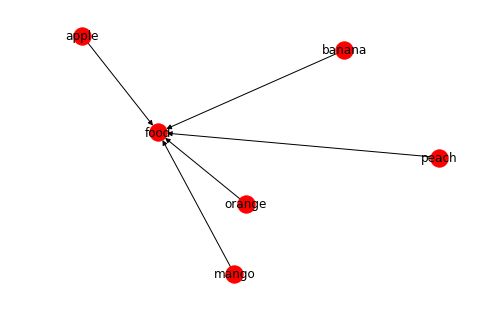

In [18]:
graph = aggregate_paths(select_paths(V, root, 2, G))
plot_graph(graph)

## This graph has higher recall.

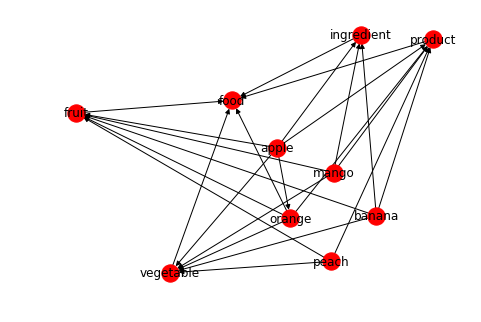

In [19]:
graph = aggregate_paths(select_paths(V, root, 3, G))
plot_graph(graph)

Overall, the following observations can be made:

Noisy relations result in significantly noisy hypernym graphs. Therefore, filtering out the relations (step 2.b) improves the accuracy. However, it also results lower recall. This is evident from the graphs constructed using paths of length = 2. 

Overall, the key challenge of taxonomy induction is to remove as much as noise as possible in each step (relations extraction, graph construction, graph pruning), while retaining as many accurate relations as possible. In this exercise, we introduced very simple techniques for filtering. However, the current state of the art involves many complicated graph optimization algorithms. The following papers provide further reading for interested readers:

a) <a href="http://www.cs.cmu.edu/~hovy/papers/10EMNLP-taxnomylearning.pdf">A Semi-Supervised Method to Learn and Construct Taxonomies using the Web</a>
<br>
b) <a href="https://www.aclweb.org/anthology/J/J13/J13-3007.pdf">OntoLearn Reloaded: A Graph-Based Algorithm for Taxonomy Induction</a><br>
c) <a href="https://infoscience.epfl.ch/record/227966/files/cikm_subseq.pdf">Taxonomy Induction Using Hypernym Subsequences</a>
